In [1]:
import pandas as pd # Import pandas for data manipulation

In [2]:
print(pd.__version__) # Display the current version of pandas

2.2.3


In [3]:
user_df = pd.read_csv(r"C:\Users\surya\Downloads\USER_TAKEHOME.csv") #Read the USER_TAKEHOME data into a dataframe

In [4]:
print(user_df.head()) # Display the first few rows of the DataFrame

                         ID               CREATED_DATE  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   

                  BIRTH_DATE STATE LANGUAGE  GENDER  
0  2000-08-11 00:00:00.000 Z    CA   es-419  female  
1  2001-09-24 04:00:00.000 Z    PA       en  female  
2  1994-10-28 00:00:00.000 Z    FL   es-419  female  
3                        NaN    NC       en     NaN  
4  1972-03-19 00:00:00.000 Z    PA       en  female  


In [5]:
print(user_df.dtypes)  # Show data types of each column

ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object


In [6]:
print(user_df.isna()) #Show the missing values in each column 

          ID  CREATED_DATE  BIRTH_DATE  STATE  LANGUAGE  GENDER
0      False         False       False  False     False   False
1      False         False       False  False     False   False
2      False         False       False  False     False   False
3      False         False        True  False     False    True
4      False         False       False  False     False   False
...      ...           ...         ...    ...       ...     ...
99995  False         False       False  False     False   False
99996  False         False       False  False     False   False
99997  False         False       False  False     False   False
99998  False         False       False  False     False   False
99999  False         False       False  False      True   False

[100000 rows x 6 columns]


In [7]:
user_missing_count = user_df.isna().sum() #Sum all the missing values in each column
print(user_missing_count) #Print the missing values in each column

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64


In [8]:
user_empty_string = (user_df.astype(str).apply(lambda col: col.str.strip() == '')).sum() #Sum all the empty strings in each column
print(user_empty_string) #Print the empty strings in each column

ID              0
CREATED_DATE    0
BIRTH_DATE      0
STATE           0
LANGUAGE        0
GENDER          0
dtype: int64


In [9]:
user_duplicate_ids = user_df['ID'].duplicated().sum() #Sum all the duplicate IDs
print(f"Number of duplicate IDs: {user_duplicate_ids}") #Print the duplicate IDs

Number of duplicate IDs: 0


In [10]:
user_duplicate_rows = user_df.duplicated().sum() #Sum all the duplicate rows 
print(f"Number of duplicate rows: {user_duplicate_rows}") #Print all the duplicate rows 

Number of duplicate rows: 0


In [11]:
#Validating the entries in the BIRTH_DATE column to see if they make sense
user_df['BIRTH_DATE'] = pd.to_datetime(user_df['BIRTH_DATE'], errors='coerce') #Convert the datatype from object to datetime for analysis
print("Earliest:", user_df['BIRTH_DATE'].min()) #Check the earliest year
print("Latest:", user_df['BIRTH_DATE'].max()) #Check the latest year

Earliest: 1900-01-01 00:00:00+00:00
Latest: 2022-04-03 07:00:00+00:00


In [12]:
#Earliest BIRTH_DATE column value 1900 and latest value 2022 need further business analysis to check whether it is an error or a placeholder value

birth_year_1900 = user_df[user_df['BIRTH_DATE'].dt.year == 1900] #Find rows with birth year 1900
print(f"Rows with birth year 1900: {birth_year_1900.shape[0]}") # Count the number of such rows
print(birth_year_1900[['ID', 'BIRTH_DATE']].head()) # Show the first few rows

Rows with birth year 1900: 4
                             ID                BIRTH_DATE
19638  5b343b1a8c5ff7623be2af93 1900-11-01 08:00:00+00:00
57986  57ac7acde4b0d25aa48097bc 1900-01-01 00:00:00+00:00
59306  6108a98aa1ffea0b098ba933 1900-12-08 00:00:00+00:00
81087  54e7918de4b0b56c0b136f3a 1900-01-01 00:00:00+00:00


In [13]:
birth_year_2022 = user_df[user_df['BIRTH_DATE'].dt.year == 2022] #Find rows with birth year 2022
print(f"Rows with birth year 2022: {birth_year_2022.shape[0]}") # Count the number of such rows
print(birth_year_2022[['ID', 'BIRTH_DATE', 'CREATED_DATE', 'STATE', 'LANGUAGE', 'GENDER']].head()) # Show the first few rows

Rows with birth year 2022: 2
                             ID                BIRTH_DATE  \
47481  623e238655c81c62f73eb4fc 2022-03-01 05:00:00+00:00   
70457  624a8e36b04b917e273da2cd 2022-04-03 07:00:00+00:00   

                    CREATED_DATE STATE LANGUAGE  GENDER  
47481  2022-03-25 20:18:14.000 Z    NY      NaN     NaN  
70457  2022-04-04 06:20:38.000 Z   NaN      NaN  female  


In [14]:
state_format_check = user_df["STATE"].str.fullmatch(r"[A-Z]{2}").value_counts() #Check values in state column to see whether they match the two letter format
print(state_format_check) #Print the count of matches

STATE
True    95188
Name: count, dtype: int64


In [15]:
print(user_df['LANGUAGE'].unique()) #Find unique values to check for any spelling inconsistencies or formatting issues

['es-419' 'en' nan]


In [16]:
print(user_df['LANGUAGE'].value_counts(dropna=False)) #Find the count of each occurence to check for any outliers

LANGUAGE
en        63403
NaN       30508
es-419     6089
Name: count, dtype: int64


In [17]:
print(user_df['GENDER'].unique()) #Find unique values to check for any spelling inconsistencies or formatting issues

['female' nan 'male' 'non_binary' 'transgender' 'prefer_not_to_say'
 'not_listed' 'Non-Binary' 'unknown' 'not_specified'
 "My gender isn't listed" 'Prefer not to say']


In [18]:
print(user_df['GENDER'].value_counts(dropna=False)) #Find the count of each occurence to check for any outliers

GENDER
female                    64240
male                      25829
NaN                        5892
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: count, dtype: int64


In [19]:
transaction_df= pd.read_csv(r"C:\Users\surya\Downloads\TRANSACTION_TAKEHOME.csv")  #Read the TRANSACTION_TAKEHOME data

In [20]:
print(transaction_df.head()) # Display the first few rows of the DataFrame

                             RECEIPT_ID PURCHASE_DATE  \
0  0000d256-4041-4a3e-adc4-5623fb6e0c99     8/21/2024   
1  0001455d-7a92-4a7b-a1d2-c747af1c8fd3     7/20/2024   
2  00017e0a-7851-42fb-bfab-0baa96e23586     8/18/2024   
3  000239aa-3478-453d-801e-66a82e39c8af     6/18/2024   
4  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1      7/4/2024   

                   SCAN_DATE STORE_NAME                   USER_ID  \
0  2024-08-21 14:19:06.539 Z    WALMART  63b73a7f3d310dceeabd4758   
1  2024-07-20 09:50:24.206 Z       ALDI  62c08877baa38d1a1f6c211a   
2  2024-08-19 15:38:56.813 Z    WALMART  60842f207ac8b7729e472020   
3  2024-06-19 11:03:37.468 Z  FOOD LION  63fcd7cea4f8442c3386b589   
4  2024-07-05 15:56:43.549 Z   RANDALLS  6193231ae9b3d75037b0f928   

        BARCODE FINAL_QUANTITY FINAL_SALE  
0  1.530001e+10              1             
1           NaN           zero       1.49  
2  7.874223e+10              1             
3  7.834000e+11           zero       3.49  
4  4.790050e+10       

In [21]:
print(transaction_df.dtypes) # Show data types of each column

RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE         object
dtype: object


In [22]:
print(transaction_df.isna()) #Show the missing values in each column 

       RECEIPT_ID  PURCHASE_DATE  SCAN_DATE  STORE_NAME  USER_ID  BARCODE  \
0           False          False      False       False    False    False   
1           False          False      False       False    False     True   
2           False          False      False       False    False    False   
3           False          False      False       False    False    False   
4           False          False      False       False    False    False   
...           ...            ...        ...         ...      ...      ...   
49995       False          False      False       False    False    False   
49996       False          False      False       False    False    False   
49997       False          False      False       False    False    False   
49998       False          False      False       False    False    False   
49999       False          False      False       False    False    False   

       FINAL_QUANTITY  FINAL_SALE  
0               False       False  
1  

In [23]:
transaction_missing_values= transaction_df.isna().sum() #Sum all the missing values in each column
print(transaction_missing_values) #Print the missing values in each column

RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64


In [24]:
transaction_empty_string = (transaction_df.astype(str).apply(lambda col: col.str.strip() == '')).sum() # #Sum all the empty strings in each column
print(transaction_empty_string) #Print the empty strings in each column

RECEIPT_ID            0
PURCHASE_DATE         0
SCAN_DATE             0
STORE_NAME            0
USER_ID               0
BARCODE               0
FINAL_QUANTITY        0
FINAL_SALE        12500
dtype: int64


In [25]:
transaction_duplicate_rows= transaction_df.duplicated().sum() #Sum all the duplicate rows 
print(f"Number of duplicate rows: {transaction_duplicate_rows}") #Print all the duplicate rows 

Number of duplicate rows: 171


In [26]:
transaction_duplicate_receipt_ids = transaction_df['RECEIPT_ID'].duplicated().sum() #Sum all the duplicate IDs 
print(f"Number of duplicate IDs: {transaction_duplicate_receipt_ids}") #Print all the duplicate RECEIPT_IDs 

Number of duplicate IDs: 25560


In [27]:
print(transaction_df['FINAL_QUANTITY'].unique()) #Find the unique values to check for format inconsistency

['1' 'zero' '2' '3' '4' '4.55' '2.83' '2.34' '0.46' '7' '18' '12' '5'
 '2.17' '0.23' '8' '1.35' '0.09' '2.58' '1.47' '16' '0.62' '1.24' '1.4'
 '0.51' '0.53' '1.69' '6' '2.39' '2.6' '10' '0.86' '1.54' '1.88' '2.93'
 '1.28' '0.65' '2.89' '1.44' '2.75' '1.81' '276' '0.87' '2.1' '3.33'
 '2.54' '2.2' '1.93' '1.34' '1.13' '2.19' '0.83' '2.61' '0.28' '1.5'
 '0.97' '0.24' '1.18' '6.22' '1.22' '1.23' '2.57' '1.07' '2.11' '0.48' '9'
 '3.11' '1.08' '5.53' '1.89' '0.01' '2.18' '1.99' '0.04' '2.25' '1.37'
 '3.02' '0.35' '0.99' '1.8' '3.24' '0.94' '2.04' '3.69' '0.7' '2.52'
 '2.27']


In [28]:
print(transaction_df['PURCHASE_DATE']) #Print the rows of PURCHASE_DATE column

0        8/21/2024
1        7/20/2024
2        8/18/2024
3        6/18/2024
4         7/4/2024
           ...    
49995    8/21/2024
49996    8/11/2024
49997    7/11/2024
49998    6/18/2024
49999     8/7/2024
Name: PURCHASE_DATE, Length: 50000, dtype: object


In [29]:
products_df= pd.read_csv(r"C:\Users\surya\Downloads\PRODUCTS_TAKEHOME.csv")  #Read the PRODUCTS_TAKEHOME data into a datafram

In [30]:
print(products_df.head()) # Display the first few rows of the DataFrame

          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4                                       MANUFACTURER  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN                           PLACEHOLDER MANUFACTURER   
3        NaN                                  COLGATE-PALMOLIVE   
4        NaN  MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...   

             BRAND       BARCODE  
0              NaN  7.964944e+11  
1              NaN  2.327801e+10  
2          ELECSOP  4.618178e

In [31]:
print(products_df.dtypes) # Show data types of each column

CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object


In [32]:
products_missing_values= products_df.isna().sum() #Sum all the missing values in each column
print(products_missing_values) #Print the missing values in each column

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64


In [33]:
products_empty_string = (products_df.astype(str).apply(lambda col: col.str.strip() == '')).sum() #Sum all the empty strings in each column
print(products_empty_string) #Print the empty strings in each column

CATEGORY_1      0
CATEGORY_2      0
CATEGORY_3      0
CATEGORY_4      0
MANUFACTURER    0
BRAND           0
BARCODE         0
dtype: int64


In [34]:
products_duplicate_barcode= products_df['BARCODE'].duplicated().sum() #Sum all the duplicate barcodes
print(f"Number of duplicate barcodes: {products_duplicate_barcode}") #Print the duplicate barcodes

Number of duplicate barcodes: 4209


In [35]:
products_duplicate_rows= products_df.duplicated().sum() #Sum all the duplicate rows 
print(f"Number of duplicate rows: {products_duplicate_rows}") #Print all the duplicate rows 

Number of duplicate rows: 215


In [36]:
#Four category columns appear to be in a hierarchy.
#This code checks for hierarchical violations such as category 2 existing without category 1 and other similar scenarios

cat2_missing_cat1 = products_df[
    products_df["CATEGORY_2"].notna() & products_df["CATEGORY_1"].isna()
].shape[0]

cat3_missing_cat2 = products_df[
    products_df["CATEGORY_3"].notna() & products_df["CATEGORY_2"].isna()
].shape[0]

cat4_missing_cat3 = products_df[
    products_df["CATEGORY_4"].notna() & products_df["CATEGORY_3"].isna()
].shape[0]

print(f"CATEGORY_2 without CATEGORY_1: {cat2_missing_cat1}")
print(f"CATEGORY_3 without CATEGORY_2: {cat3_missing_cat2}")
print(f"CATEGORY_4 without CATEGORY_3: {cat4_missing_cat3}")

CATEGORY_2 without CATEGORY_1: 0
CATEGORY_3 without CATEGORY_2: 0
CATEGORY_4 without CATEGORY_3: 0


In [37]:
# Summarize key quality issues for each file in a dictionary

quality_issues = {
    "USER_TAKEHOME": {
        "Missing Values": user_df.isna().sum().sum(),
        "Empty Strings": (user_df.astype(str).apply(lambda col: col.str.strip() == '')).sum().sum(),
        "Duplicate IDs": user_df['ID'].duplicated().sum(),
        "Duplicate Rows": user_df.duplicated().sum()
    },
    "TRANSACTION_TAKEHOME": {
        "Missing Values": transaction_df.isna().sum().sum(),
        "Empty Strings": (transaction_df.astype(str).apply(lambda col: col.str.strip() == '')).sum().sum(),
        "Duplicate Receipt IDs": transaction_df['RECEIPT_ID'].duplicated().sum(),
        "Duplicate Rows": transaction_df.duplicated().sum()
    },
    "PRODUCTS_TAKEHOME": {
        "Missing Values": products_df.isna().sum().sum(),
        "Empty Strings": (products_df.astype(str).apply(lambda col: col.str.strip() == '')).sum().sum(),
        "Duplicate Barcodes": products_df['BARCODE'].duplicated().sum(),
        "Duplicate Rows": products_df.duplicated().sum()
    }
}

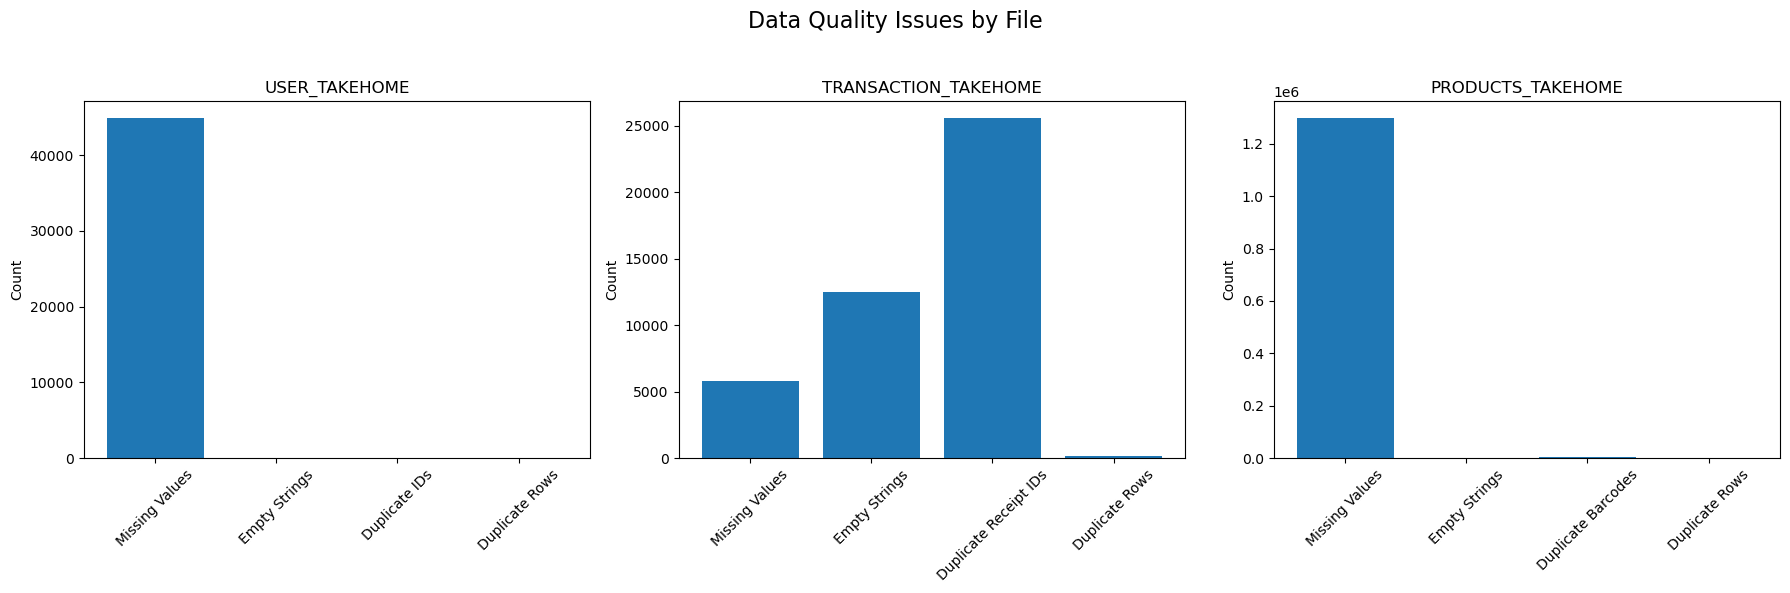

In [39]:
#Visualize key quality issues in each file using a logarithmic scale graph to better highlight the range of value differences
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Data Quality Issues by File", fontsize=16)

for idx, (file, issues) in enumerate(quality_issues.items()):
    axs[idx].bar(issues.keys(), issues.values())
    axs[idx].set_title(file)
    axs[idx].set_ylabel("Count")
    axs[idx].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [40]:
#Calulating the the delay between scan date and purchase date by store name

# Strip timezone info from SCAN_DATE and PURCHASE_DATE
transaction_df['SCAN_DATE'] = pd.to_datetime(transaction_df['SCAN_DATE']).dt.tz_localize(None)
transaction_df['PURCHASE_DATE'] = pd.to_datetime(transaction_df['PURCHASE_DATE']).dt.tz_localize(None)

# Recalculate scan delay in days
transaction_df['SCAN_DELAY_DAYS'] = (transaction_df['SCAN_DATE'] - transaction_df['PURCHASE_DATE']).dt.days

# Filter out extreme or invalid delays
valid_delays = transaction_df[transaction_df['SCAN_DELAY_DAYS'].between(0, 30)]

# Compute average scan delay by store
avg_delay_by_store = valid_delays.groupby('STORE_NAME')['SCAN_DELAY_DAYS'].mean().sort_values(ascending=False)

avg_delay_by_store.head(10)

STORE_NAME
VITACOST                       20.0
BOONEVILLE SHOPWISE            14.0
INCO FOODS                     13.0
CANNON AEB COMMISSARY          13.0
PRESTON FOODS                  13.0
FAIRPLAY FINER FOODS           12.0
ALCT                           12.0
CAMP PENDLETON COMMISSARY      12.0
SCHNEIDER'S MARKET             12.0
RHODES FAMILY PRICE CHOPPER    12.0
Name: SCAN_DELAY_DAYS, dtype: float64

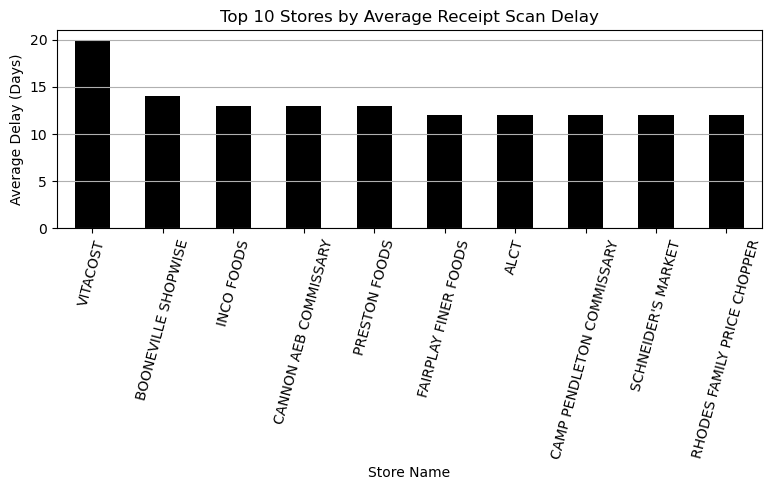

In [41]:
top_10_delay_stores = avg_delay_by_store.head(10) #Store the top 10 stores with most delay

# Visualize the delay in scan date and purchase date of top 10 stores using a bar chart
plt.figure(figsize=(8, 5))
top_10_delay_stores.plot(kind='bar', color='black')
plt.title("Top 10 Stores by Average Receipt Scan Delay")
plt.ylabel("Average Delay (Days)")
plt.xlabel("Store Name")
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [42]:
#Calculate the delay in scan date and purchase date by age group

delay_user_df = transaction_df.merge(user_df, left_on='USER_ID', right_on='ID', how='left') # Merge TRANSACTION and USER data to get birth dates


delay_user_df['BIRTH_DATE'] = pd.to_datetime(delay_user_df['BIRTH_DATE'], errors='coerce') # Convert BIRTH_DATE column to datetime
delay_user_df['AGE'] = 2025 - delay_user_df['BIRTH_DATE'].dt.year # Calculate age by extracting the year


delay_user_df = delay_user_df[delay_user_df['AGE'].between(10, 100)] # Drop unrealistic ages

delay_user_df = delay_user_df[delay_user_df['SCAN_DELAY_DAYS'].between(0, 30)] # Focus on users with valid scan delays (0-30 days)


age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 100] # Define age group bins
delay_user_df['AGE_GROUP'] = pd.cut(delay_user_df['AGE'], bins=age_bins) # Group by age group bins


avg_delay_by_age_group = delay_user_df.groupby('AGE_GROUP')['SCAN_DELAY_DAYS'].mean() # Calculate average scan delay per age group

avg_delay_by_age_group.head(10) # Print the rows

C:\Users\surya\AppData\Local\Temp\ipykernel_25176\1579614915.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay_by_age_group = delay_user_df.groupby('AGE_GROUP')['SCAN_DELAY_DAYS'].mean() # Calculate average scan delay per age group


AGE_GROUP
(10, 20]          NaN
(20, 30]     1.750000
(30, 40]     2.961538
(40, 50]     1.272727
(50, 60]     3.083333
(60, 70]     1.318182
(70, 80]     0.944444
(80, 100]    0.333333
Name: SCAN_DELAY_DAYS, dtype: float64

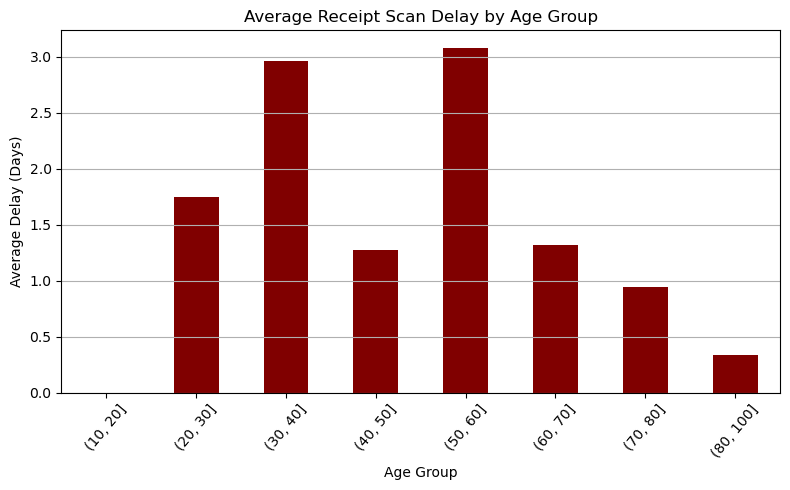

In [43]:
# Visualize the delay in scan date and purchase date by age group using a bar chart

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
avg_delay_by_age_group.plot(kind='bar', color='maroon')
plt.title("Average Receipt Scan Delay by Age Group")
plt.ylabel("Average Delay (Days)")
plt.xlabel("Age Group")
plt.xticks(rotation=50)
plt.grid(axis='y')
plt.tight_layout()
plt.show()